In [6]:
#importing important libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [49]:
#loading the dataset to pandas dataframe
data = 'graduate_admission.csv'
df = pd.read_csv(data)

#printing top 5 rows
df.head()

FileNotFoundError: ignored

In [8]:
# Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       400 non-null    int64  
 1   gre         400 non-null    int64  
 2   toefl       400 non-null    int64  
 3   uni_rating  400 non-null    int64  
 4   sop         400 non-null    float64
 5   lor         400 non-null    float64
 6   cgpa        400 non-null    float64
 7   research    400 non-null    int64  
 8   admit       400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [9]:
#target 
target = 'admit'



In [10]:
# Seperating data into Training and Validation Data
training_df = df.sample(frac=0.85, random_state=101)
validation_df = df.drop(training_df.index)

In [11]:
print(f'[INFO] shape of training data {training_df.shape}')
print(f'[INFO] shape of validation data {validation_df.shape}')

[INFO] shape of training data (340, 9)
[INFO] shape of validation data (60, 9)


In [18]:
# Removing labels from data and converting to numpy array
training_labels = training_df.pop(target).values
validation_labels = validation_df.pop(target).values

In [12]:
# basic stats of the training dataset
stats = training_df.describe().transpose()
print(stats)

            count        mean         std  ...      50%     75%     max
index       340.0  200.150000  114.640690  ...  199.500  297.25  400.00
gre         340.0  316.561765   11.390585  ...  316.500  325.00  340.00
toefl       340.0  107.247059    6.120050  ...  107.000  111.25  120.00
uni_rating  340.0    3.070588    1.134477  ...    3.000    4.00    5.00
sop         340.0    3.388235    1.017912  ...    3.500    4.00    5.00
lor         340.0    3.451471    0.897307  ...    3.500    4.00    5.00
cgpa        340.0    8.584794    0.605356  ...    8.565    9.08    9.92
research    340.0    0.523529    0.500182  ...    1.000    1.00    1.00
admit       340.0    0.722471    0.143358  ...    0.730    0.82    0.97

[9 rows x 8 columns]


In [13]:
# scaling data w.r.t training_df
normalization_training_df = (training_df-stats['mean'])/stats['std']
normalization_validation_df = (validation_df-stats['mean'])/stats['std']

In [14]:
# converting the data to numpy array
training_data = normalization_training_df.to_numpy()
validation_data = normalization_validation_df.to_numpy()

In [15]:
# data type
print(f'[INFO] type of training data {type(training_data)}')
print(f'[INFO] type of validation data {type(validation_data)}')

[INFO] type of training data <class 'numpy.ndarray'>
[INFO] type of validation data <class 'numpy.ndarray'>


In [16]:
# prepare tf.data.Dataset for training
def prepare_dataset(data , labels , batch, shuffle):
  dataset = tf.data.Dataset.from_tensor_slices((data , labels))
  dataset = dataset.shuffle(shuffle)
  dataset = dataset.batch(batch).prefetch(1)
  return dataset

In [23]:
# preparing Dataset for training
batch_size = 32
buffer = 100
training_dataset = prepare_dataset(training_data, training_labels, batch_size, buffer)
validation_dataset = prepare_dataset(validation_data, validation_labels, batch_size, buffer)

In [20]:


print(type(training_data))

<class 'numpy.ndarray'>


In [22]:
### building ANN model

In [39]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(12, activation = 'relu'),
                              tf.keras.layers.Dense(8, activation = 'sigmoid'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                                tf.keras.layers.Dense(1)
])

In [40]:
model.compile(optimizer=tf.keras.optimizers.SGD(), 
              loss=tf.keras.losses.mse,
               metrics='mae')

In [41]:
history = model.fit(
    training_dataset,
    epochs=50,
    validation_data = validation_dataset
)

Epoch 1/50
11/11 [==============================] - 0s 12ms/step - loss: 1.3933 - mae: 1.1618 - val_loss: 0.6197 - val_mae: 0.7746
Epoch 2/50
11/11 [==============================] - 0s 4ms/step - loss: 0.5067 - mae: 0.6956 - val_loss: 0.2953 - val_mae: 0.5261
Epoch 3/50
11/11 [==============================] - 0s 4ms/step - loss: 0.2331 - mae: 0.4640 - val_loss: 0.1622 - val_mae: 0.3795
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 0.1283 - mae: 0.3313 - val_loss: 0.0976 - val_mae: 0.2828
Epoch 5/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0773 - mae: 0.2488 - val_loss: 0.0635 - val_mae: 0.2212
Epoch 6/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0534 - mae: 0.2003 - val_loss: 0.0449 - val_mae: 0.1797
Epoch 7/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0362 - mae: 0.1595 - val_loss: 0.0342 - val_mae: 0.1557
Epoch 8/50
11/11 [==============================] - 0s 4ms/step - loss: 0.0282 - mae: 0.1

In [42]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


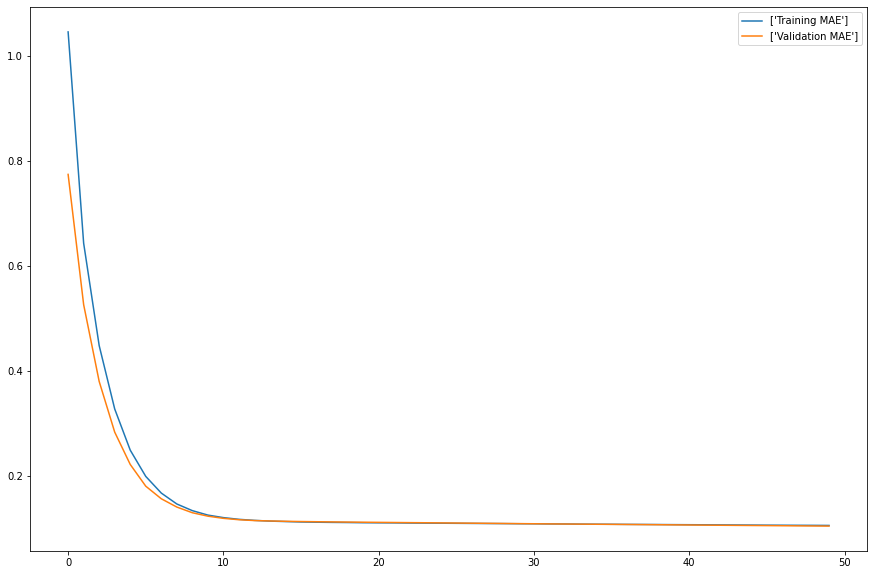

In [43]:
# plotting Training and Validation Loss and MAE
mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = range(len(mae))

plt.figure(figsize=(15,10))
plt.plot(epochs, mae , label=['Training MAE'])
plt.plot(epochs, validation_mae , label=['Validation MAE'])
plt.legend()
plt.savefig('mae.jpg')
plt.show()

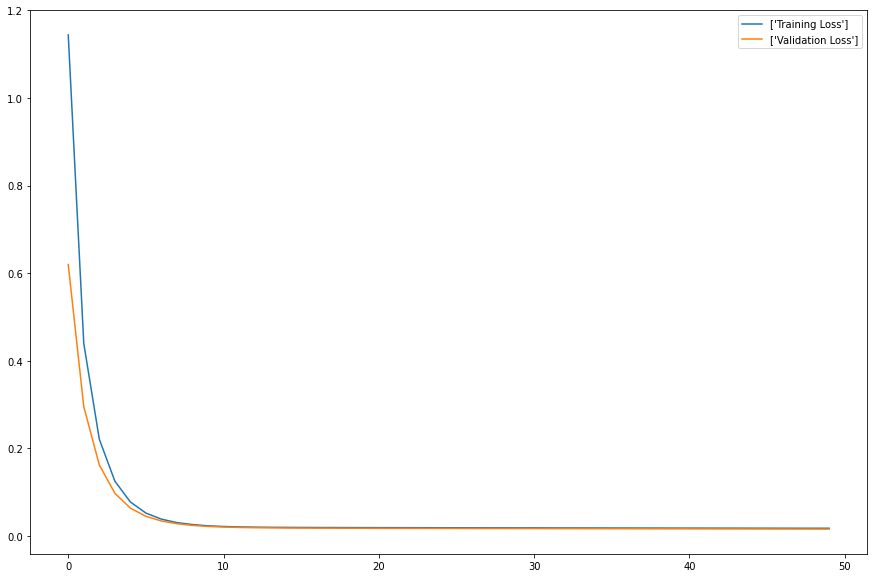

In [44]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(len(mae))


plt.figure(figsize=(15,10))
plt.plot(epochs, loss , label=['Training Loss'])
plt.plot(epochs, validation_loss , label=['Validation Loss'])
plt.legend()
plt.savefig('loss.jpg')
plt.show()

In [48]:
model.predict(validation_dataset).mean()

0.72587174